<a href="https://colab.research.google.com/github/jov580/astro-cirq/blob/main/Shor's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tema:** Šorov algoritam i primene u RSA
# **Student:** Jovana Lazić 21/2022
# **Profesor:** Anđelka Kovačević

### Paket cirq

Koristimo paket **cirq** da bismo simulirali kvantni racunar.

In [41]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

# **Šorov algoritam**

U ovom projektu bavimo se Šorovim algoritmom (Shor's algorithm). Algoritam rešava problem faktorizacije celih brojeva. Za dati broj algoritam vraća njegove proste delioce.

### **Zašto nam je značajan?**
Složenost ovog algoritma je:

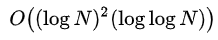

Dakle, složenost Šorovog algoritma je polinomijalna, što je skoro pa eksponencijalno bolje od najboljeg klasičnog algoritma, koji je subeksponencijalne složenosti:

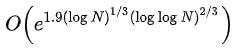

### **Peter Shor**

Peter Shor je izumeo Šorov algoritam 1994. godine. Za svoje rezultate dobio je brojne nagrade, i takođe ušao u istoriju kao čovek koji je uspeo da obori kriptografiju modernog doba.

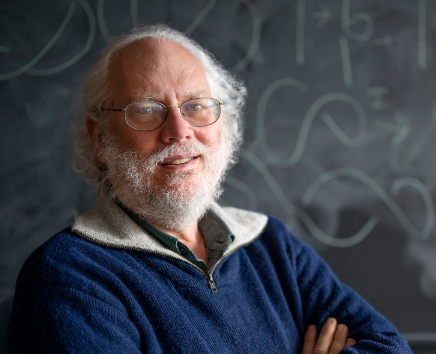

# **Algoritam i objašnjenja**

## **Modularna aritmetika i poredak broja**

Ako znamo da je:

* *a = b mod N*

znamo i da postoji ceo broj *k* za koji važi sledeće:

* *a + kN = b*

Posmatrajmo sledeću jednačinu:

* *xᴿ = 1 mod N*,

gde su *x* i *N* uzajamno prosti, odnosno nzd(x, N) = 1. Dokazaćemo da je nalaženje ovog broja *R* ekvivalentno pronalaženju faktora broja. *R* koje ispunjava ovu jednakost naziva se poredak broja *x* po modulu *N*. Neka je *N* jednako proizvodu nekih brojeva *m1* i *m2*, odnosno *N = m1m2*.


***y^2 = 1, mod N***

***y^2 - 1 = 0, mod N***

***(y - 1)(y + 1) = 0, mod N***

***(y - 1)(y + 1) = 0, mod m1m2***



 Postoje dve mogućnosti, prvi slučaj:

***y + 1 = 0, mod m1*** i ***y - 1 = 0, mod m2***

i drugi slučaj, u kome je:

***y + 1 = 0, mod N*** i ***y - 1 = 0, mod 1***

Drugi slučaj daje nam trivijalno rešenje u kome važi sledeće:

***nzd(y + 1, N) = N***

***nzd(y - 1, N) = 1***

Ovo rešenje je trivijalno i to nije rešenje koje želimo. Naše željeno rešenje je:

***nzd(y + 1, N) = m1***

***nzd(y - 1, N) = m2***

Koristeći Euklidov algoritam možemo brzo i efikasno računati najveći zajednički delilac. Sada pokušavamo da nađemo broj *R*, takav da je paran i da za njega važi sledeće:

***y^2 = (x^{R/2})^2 = 1, mod N***

Ukoliko smo dobili neparno *R*, menjamo *x* i ponavljamo postupak. Vratimo se sada na slučaj kada je *R* paran. Pretpostavimo da nismo dobili trivijalno rešenje. U tom slucaju važi:

***m1 = nzd(x^{R/2} + 1, N)***

***m2 = nzd(x^{R/2} - 1, N)***


## **Kvantne Furijeove transformacije**

Kvantna Furijeova transformacija je linearna transformacija sa kvantnim bitovima, odnosno kjubitima. U kvantnom računarstvu ona predstavlja analogiju klasičnih Furijeovih transformacija.

Kvatne Furijeove transformacije deluju na kvantnom stanju:

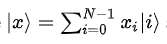

i prebacuju ga u kvantno stanje:

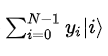

koristeći se formulom:

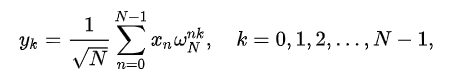


Glavna svojstva kvantnih Furijeovih transformacija možemo dobiti iz unitarnosti matrice preslikavanja.


## **Kvantni paralelizam**

Kvantni paralelizam predstavlja osnovu za većinu kvantnih algoritama. On nam omogućava da za datu funkciju računamo njenu vrednost u više tačaka istovremeno. Ovo svojstvo se koristi u Šorovom algoritmu, i čini jednu od glavnih ideja ovog algoritma.

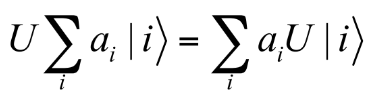

Preciznije, koristimo ga kada računamo stepene funkcije *x* koji se periodično ponavljaju istovremeno.

## **Amplitude i verovatnoće**

Ovo čini drugu od dve najznačajnije ideje Šorovog algoritma. Funkcija pokušava da podešava amplitude tako da postoji velika verovatnoća da dobijemo vrednost period. **Napomena:** zahvaljujući kvantnim Furijeovim transformacijama nekada nam je dovoljno da "velika verovatnoća" bude 1/2. Ovo je dovoljno zbog načina na koji QTF preslikava.


# **Primer: n = 21**



1.   Biramo broj *x* takav da je 1 < x < n, i da je uzajamno prost sa n. Jedan takav broj je 11.
2.   Tražimo *N* koji je stepen dvojke takav da se nalazi izmedju *n^2* i *2n^2*. Jedan takav broj je *N = 512*. Inicijalizujemo stanja za dva kvantna registra dužine *l*:

 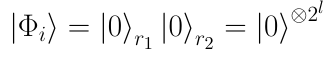

3. Inicijalizujemo prvi registar na superpoziciju svih mogućih stanja *a* po modulu *N*:

 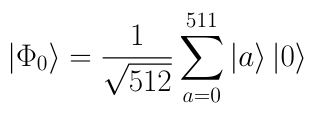

 što na svim bitovima odgovara vrednosti:

 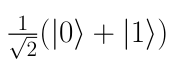

4. Inicijalizujemo drugi registar za sve vrednosti *xᴬ mod N*:

 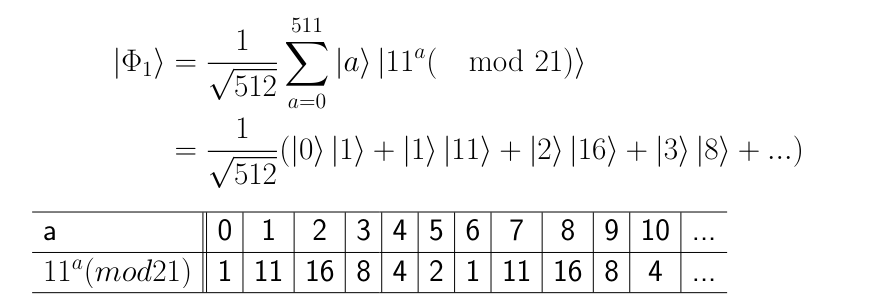

 Primetimo da je period 6.

5. Primenjujemo kvantnu Furijeovu transformaciju:

  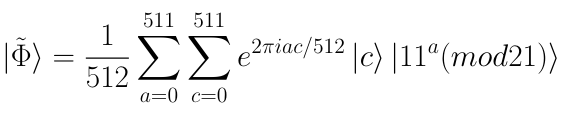

6. Merimo verovatnoće za različite vrednosti *c*:
  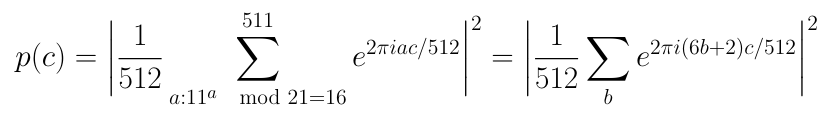

  Posmatrajmo ove vrednosti na grafiku:

 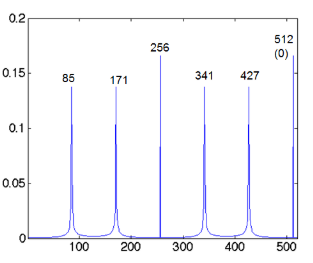

 Primetimo da se vrhunci nalaze na svakih 512/6.

7. Proverimo za *r = 6*
 * paran je
 * 11^3 mod n nije -1

 Kako oba uslova važe, možemo da izračunamo faktore:


  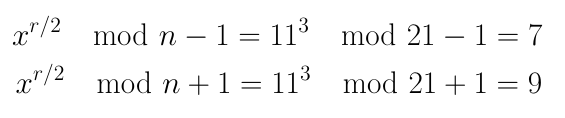

 Dakle, imamo da je:

 ***m1 = nzd(21, 7) = 7***

 ***m2 = nzd(21, 9) = 3***


In [22]:
import fractions
import math
import random

import numpy as np
import sympy
from typing import Callable, Iterable, List, Optional, Sequence, Union

Naredna funckija pronalazi poredak broja *x* po modulu *n*. Ona ne koristi kvantno kolo, vec poredak pronalazi na klasican nacin. (ovde je samo radi demonstracije).

In [7]:
def classical_order_finder(x: int, n: int) -> Optional[int]:

    if x < 2 or x >= n or math.gcd(x, n) > 1:
        raise ValueError("Ovo x nema poredak po broju n. Unesite broj koji je izmedju 1 i n(ne ukljucujuci ih) i koji je uzajamno prost sa n")

    r, y = 1, x
    while y != 1:
        y = (x * y) % n
        r += 1
    return r

Sledeca klasa opisuje kvantnu kapiju koju koristimo za stepenovanje broja zadatog kao bazu na dati eksponent po modulu *n*.

Atributi klase:


*   baza (broj koji stepenujemo)
*   eksponent (stepen)
*   modul
*   kvantni registar(od kjubita) u koji cemo upisati rezultat

*V* racuna modularni eksponent x^e mod n na sledeci nacin:

*   **V |y⟩ |e⟩ = |y ⋅ x\^e mod n⟩ |e⟩** , za *0 <= y < n*
*   **V|y⟩|e⟩ = |y⟩ |e⟩**, za *n <= y*

gde *y* predstavlja kjubitni registar u koji upisujemo rezultat, *e* eksponent, *x* bazu, a *n* modul.

Tako da je:
**V|y⟩|e⟩ = (U^e|y)|e⟩**

gde je *U* definisano kao:
* **U|y⟩ = |y ⋅ x mod n⟩**, za 0 <= y < n
* **U|y⟩ = |y⟩** , n <= y


In [8]:
class ModularExp(cirq.ArithmeticGate):
    def __init__(
        self,
        target: Sequence[int],
        exponent: Union[int, Sequence[int]],
        base: int,
        modulus: int
    ) -> None:
        if len(target) < modulus.bit_length():
            raise ValueError('Nedovoljno kjubita za brojeve datog modula')
        self.target = target
        self.exponent = exponent
        self.base = base
        self.modulus = modulus

    def registers(self) -> Sequence[Union[int, Sequence[int]]]:
        return self.target, self.exponent, self.base, self.modulus

    def with_registers(
        self, *new_registers: Union[int, Sequence[int]]
    ) -> 'ModularExp':
        #naredni deo nije od idejnog znacaja, samo provera da li su tipovi odgovarajuci, da li ih ima dovoljno itd..
        if len(new_registers) != 4:
            raise ValueError('Broj argumenata mora biti 4!')
        target, exponent, base, modulus = new_registers
        if not isinstance(target, Sequence):
            raise ValueError('Target mora biti registar kjubita')
        if not isinstance(base, int):
            raise ValueError('Baza nam treba kao ceo broj')
        if not isinstance(modulus, int):
            raise ValueError('Modul mora biti ceo broj')
        return ModularExp(target, exponent, base, modulus)

    def apply(self, *register_values: int) -> int:

        assert len(register_values) == 4
        target, exponent, base, modulus = register_values
        if target >= modulus:
            return target
        return (target * base**exponent) % modulus

# ova funkcija vraca objekat tipa cirq.CircuitDiagramInfo za ispisivanje kvantnog kola
# ona nam daje informacije o registrima kako bi oni prilikom ispisivanja bili pravilno labelovani
    def _circuit_diagram_info_(
      self, args: cirq.CircuitDiagramInfoArgs
    ) -> cirq.CircuitDiagramInfo:
        assert args.known_qubits is not None
        wire_symbols = [f't{i}' for i in range(len(self.target))]
        e_str = str(self.exponent)
        if isinstance(self.exponent, Sequence):
            e_str = 'e'
            wire_symbols += [f'e{i}' for i in range(len(self.exponent))]
        wire_symbols[0] = f'ModularExp(t*{self.base}**{e_str} % {self.modulus})'
        return cirq.CircuitDiagramInfo(wire_symbols=tuple(wire_symbols))

Funkcija koja sledi kreira kvantno kolo koje nam sluzi za trazenje poretka broja. Njena povratna vrednost je to kolo. Ovo kolo koristi algoritam za procenu kvantne faze (*Quantum Phase Estimation Algorithm*) koji nam daje procenu faze koja odgovara datoj unitarnoj matrici *U*. Unitarnu matricu *U* definisemo na sledeci nacin:
* **U|y⟩ = |y ⋅ x mod n⟩**, za 0 <= y < n
* **U|y⟩ = |y⟩**, za n <= y

In [9]:
#Funkcija koja kreira kvantno kolo za trazenje poretka broja
def make_order_finding_circuit(x: int, n: int) -> cirq.Circuit:
    L = n.bit_length()
    target = cirq.LineQubit.range(L)
    exponent = cirq.LineQubit.range(L, 3 * L + 3)

    # Create a ModularExp gate sized for these registers.
    mod_exp = ModularExp([2] * L, [2] * (2 * L + 3), x, n)

    return cirq.Circuit(
        cirq.X(target[L - 1]),
        cirq.H.on_each(*exponent),
        mod_exp.on(*target, *exponent),
        cirq.qft(*exponent, inverse=True),
        cirq.measure(*exponent, key='exponent'),
    )

Funckija koja sledi u nastavku čita i interpretira dobijene vrednosti iz kola koje nam daje poredak broja (koje nam vraća funkcija make_order_finding_circuit), i vraća nam ga kao ceo broj. Preciznije, ova funkcija nalazi broj *s/r* takav da je *e^{2πis/r}*  sopstvena vrednost unitarne matrice *U*, definisane kao i prethodne. Zatim, sada kada imamo broj *s/r*, skraćivanjem tražimo broj *r*. Ukoliko ga funkcija pronađe, vraća *r*, inače vraća None.

In [10]:
def process_measurement(result: cirq.Result, x: int, n: int) -> Optional[int]:
    # Citanje eksponenta iz registra
    exponent_as_integer = result.data["exponent"][0]
    exponent_num_bits = result.measurements["exponent"].shape[1]
    eigenphase = float(exponent_as_integer / 2**exponent_num_bits)

    # Preko fractions algoritma racuna f = s / r.
    f = fractions.Fraction.from_float(eigenphase).limit_denominator(n)

    # Ako nam je numerator jednak nuli, proces trazenja poretka je neuspesan
    if f.numerator == 0:
        return None

    # Ako je razlicit od nule, proveravamo da li je validan i u tom slucaju ga vracamo
    r = f.denominator
    if x**r % n != 1:
        return None
    return r

Ova funkcija ima potpuno istu namenu kao gore navedena funkcija classical_order_finder. Jedina razlika je u tome što u ovoj funkciji ne tražimo poredak na klasičan način, već kao što je gore u teorijskom delu objašnjeno.

Dati su parametri *x* i *n*, potrebno je naći poredak broja *x* po modulu *n*.

In [11]:
def quantum_order_finder(x: int, n: int) -> Optional[int]:
    # kao i u klasičnoj verziji ove funkcije, proveravamo da li je x odgovarajuce
    if x < 2 or n <= x or math.gcd(x, n) > 1:
        raise ValueError("Ovo x nema poredak po broju n. Unesite broj koji je izmedju 1 i n(ne ukljucujuci ih) i koji je uzajamno prost sa n")

    # pozivamo funkciju za kreiranje kola koje pronalazi poredak
    circuit = make_order_finding_circuit(x, n)

    # kolo koje smo koristili za pronalazenje poretka
    measurement = cirq.sample(circuit)

    # vracamo izmerene rezultate
    return process_measurement(measurement, x, n)

Funkcija koja sledi proverava da li je broj koji želimo da faktorišemo stepen prostog broja. Ukoliko jeste, povratna vrednost funkcije je broj čiji stepen faktorišemo. Ako nije, funkcija ne vraća ništa (None).

In [ ]:
def find_factor_of_prime_power(n: int) -> Optional[int]:
    for k in range(2, math.floor(math.log2(n)) + 1):
        c = math.pow(n, 1 / k)
        c1 = math.floor(c)
        if c1**k == n:
            return c1
        c2 = math.ceil(c)
        if c2**k == n:
            return c2
    return None

Funkcija u nastavku ne vraća ništa (None) u slučaju da je dati broj prost, inače vraća jedan njegov prost faktor. Za razliku od prethodne funkcije koja nalazi faktor samo u specijalnom slučaju (kada je *n* stepen nekog prostog broja), ova funkcija pronalazi faktor u opštem slučaju, a u specijalnom samo poziva prethodnu funkciju (ili ne vraća vrednost u slučaju kada je broj prost).

Argumenti funkcije koja sledi su:
* *n* - broj koji treba da se faktoriše
* order_finder - ovaj parametar može imati jednu od sledeće dve vrednosti:

 1.   classical_order_finder - koristimo ga kao parametar ukoliko želimo da poredak tražimo na klasičan način, u ovom projektu ga možemo koristiti da bismo upoređivali sa kvantnim, na kome je akcenat u ovom projektu
 2.   quantum_order_finder - koristimo ga u ovom projektu, pronalazi poredak kvantnim izračunavanjima, kako nam je ovaj algoritam značajniji za projekat, on nam je default ukoliko ne odaberemo ništa

* max_attempts - koristimo ga da ograničimo broj pokušaja traženja *x*, odnosno broj "ubadanja" nasumičnog broja. Ovaj parametar je takođe opcion, ukoliko ne zadamo nikakvu vrednost automatski se postavlja na 30 pokušaja


Povratna vrednost je netrivijalan faktor broja *n*, ukoliko postoji/je pronađen u odgovarajućem broju pokušaja.



In [12]:
def find_factor(
    n: int,
    order_finder: Callable[[int, int], Optional[int]] = quantum_order_finder,
    max_attempts: int = 30
) -> Optional[int]:
    # proveravamo da li je n prost broj
    if sympy.isprime(n):
        print("n is prime!")
        return None

    # proveravamo slucaj kada je n paran i njega resavamo direktno
    if n % 2 == 0:
        return 2

    # ako je n stepen prostog broja, mozemo pozvati funkciju gore da efikasno nadjemo njegov prosti faktor
    c = find_factor_of_prime_power(n)
    if c is not None:
        return c

    for _ in range(max_attempts):
        # za x biramo nasumican broj izmedju 2 i n-1
        x = random.randint(2, n - 1)

        c = math.gcd(x, n)

        # ako x i n nisu uzajamno prosti, imamo prvi netrivijalan faktor
        if 1 < c < n:
            return c

        # koristimo funkciju koju smo gore napravili da pronadjemo poredak broja x po modulu n
        r = order_finder(x, n)

        # ako poredak nije uspesno nadjen, pokusavamo ponovo
        if r is None:
            continue

        # ako je poredak paran, pokusavamo ponovo
        if r % 2 != 0:
            continue

        # izracunavanje faktora koji nje prost
        y = x**(r // 2) % n
        assert 1 < y < n
        c = math.gcd(y - 1, n)
        if 1 < c < n:
            return c

    print("Iskoriscen je maksimalan broj pokusaja a nije pronadjen ni jedan delilac.")
    return None

Kod koji sledi izvršava faktorizaciju datog broja (kog možete zadati u prostoru za *n*). Primetimo da ovaj algoritam rastavlja brojeve na dva faktora (prosta ukoliko je n proizvod dva prosta faktora). Ovo radimo zbog potrebe ovog projekta da svi *n* imaju samo dva prosta broja za svoje faktore(odnosno zog primene u RSA), ali možemo videti da bi isti kod, uz minimalnu modifikaciju, radio i za brojeve koji imaju više prostih faktora.

In [21]:
n = 21

# Pronalazenje faktora
# u opciju za order_finder mozemo staviti classic_order_finder u slucaju da zelimo da testiramo
p = find_factor(n, order_finder=quantum_order_finder)
q = n // p

print("Factoring n = pq =", n)
print("p =", p)
print("q =", q)

Factoring n = pq = 21
p = 7
q = 3


# **RSA**

Ključevi za RSA algoritam generišu se na sledeći način:

1. Izabrati dva velika prosta broja p i q.
    - Da bi faktorizacija bila teža, p i q treba nasumično izabrati, da budu oba velika i da imaju veliku razliku. Standardni metod za izbor je da se nasumično izaberu celobrojne vrednosti i proverava da li su prosti dok se ne pronađu dva prosta broja.
    - p i q treba da se čuvaju u tajnosti.
2. Izračunati n = pq.
    - n se koristi kao modul za oba, i javni i privatni ključ. Njegova dužina, obično izražena u bitovima, je dužina ključa.
    - n se objavljuje kao deo javnog ključa.
3. Izračunati φ(n), gde je φ Ojlerova funkcija. Pošto je n = pq, φ(n) = (p - 1)(q - 1)
    - φ(n) se čuva u tajnosti.
4. Izabrati ceo broj e takav da je 1 < e < φ(n) i gcd(e, φ(n)) = 1; to jest, e i φ(n) su uzajamno prosti.
    - e sa kratkom dužinom u bitovima rezultuje efikasnijim šifrovanjem – najčešće korišćena vrednost za e je 2^16 + 1 = 65537. Najmanja (i najbrža) moguća vrednost za e je 3, ali je pokazano da tako mala vrednost za e nije dovoljno sigurna u nekim slučajevima.
    - e se objavljuje kao deo javnog ključa.
5. Odrediti d kao d ≡ e^−1 (mod φ(n)); to jest, d je modularni multiplikativni inverz e modulo φ(n).
    - Ovo znači: rešiti za d jednačinu de ≡ 1 (mod φ(n)); d se može efikasno izračunati korišćenjem proširenog Euklidovog algoritma, zahvaljujući tome što su e i φ(n) međusobno prosti.
    - d se čuva u tajnosti kao eksponent privatnog ključa.

Kada imamo generisane ključeve, poruku šifrujemo javnim ključem na sledeći način:

1. Poruka M se kodira u broj m, 0 ≤ m < n unapred dogovorenim, reverzibilnim protokolom koji nazivamo "šema za pakovanje".
2. Računamo c ≡ m^e (mod n)
    - Ovo možemo uraditi dosta brzo koristeći algoritam modularnog stepenovanja
3. Šaljemo c onome ko može da dešifruje poruku, tj. onome ko poseduje odgovarajući privatni ključ

Onaj ko poseduje privatni kluč dešifruje poruku c na sledeći način:

1. Računamo c^d ≡ (m^e)^d ≡ m (mod n)
2. Dekodiramo broj m u poruku M tako što obrnemo rezultat šeme za pakovanje

In [17]:
import rsa

# pomocu biblioteke generisemo javni i privatni kljuc
publicKey, privateKey = rsa.newkeys(512)

message = input("Unesite poruku: ")

# enkriptujemo poruku javnim kljucem
encMessage = rsa.encrypt(message.encode(), publicKey)

print("Pocetna poruka: ", message)
print("Enkriptovana poruka: ", encMessage)

# poruku mozemo dekriptovati samo pomocu privatnog kljuca, ukoliko imamo samo javni kljuc ne mozemo nista
decMessage = rsa.decrypt(encMessage, privateKey).decode()

print("Dekriptovana poruka: ", decMessage)


Unesite poruku: o
Pocetna poruka:  o
Enkriptovana poruka:  b'(E\xbfM\x8euc,\x02\xafG\x1b\x1e4(\x10\xbcE\x0c#\xc5\xd6\x91F\x0f\x0e\xd6\x15Ub\xe6\xa0T\xd9\xa7\x15\n4\x075\xdf\xa7|`\xe6\xc9\xa8\x15\xea\x17Is"\xc4\xa8\x9d\xf3\x0c\x1a\xe6\x10=\xbb\xe1'
Dekriptovana poruka:  o


In [45]:
decode_dict = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k',
               11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'r', 17: 's', 18: 't', 19: 'u', 20: 'v'}
encode_dict = {l: i for i, l in decode_dict.items()}


def euclid(a, b):
    r_prev, r = a, b
    x_prev, x = 1, 0
    y_prev, y = 0, 1

    while r > 0:
        q = r_prev // r
        r_prev, r = r, r_prev - q * r
        x_prev, x = x, x_prev - q * x
        y_prev, y = y, y_prev - q * y

    return x_prev, y_prev


def mod_inv(x, m):
    x_inv, _ = euclid(x, m)
    return x_inv % m


def generate_key_pair(p, q, e):
    n = p * q
    phi = (p - 1) * (q - 1)
    d = mod_inv(e, phi)

    public_key = (n, e)
    private_key = (n, d)

    return private_key, public_key


def encode(m):
    return encode_dict[m]


def decode(m):
    return decode_dict[m]


def encrypt(m, pubkey):
    m = encode(m)
    n, e = pubkey
    c = (m ** e) % n
    return decode(c)


def decrypt(c, privkey):
    c = encode(c)
    n, d = privkey
    m = (c ** d) % n
    m = decode(m)
    return m


_, pub = generate_key_pair(p=3, q=7, e=5)
m = input('Unesite poruku, bez razmaka: ')
c = ''.join(encrypt(ch, pub) for ch in m)
print('Poruka: \t\t', m)
print('Sifrovana poruka: \t', c)
print(f'Javni kljuc: (n = {pub[0]}, e = {pub[1]})')

p = find_factor(n, order_finder=quantum_order_finder)
q = n // p
priv, _ = generate_key_pair(p, q, 5)
c_dec = ''.join(decrypt(ch, priv) for ch in c)
print(f'Pronadjen privatni kljuc: (n = {priv[0]}, d = {priv[1]})')
print('Desifrovana poruka: \t', c_dec)


Unesite poruku, bez razmaka: cikcik
Poruka: 		 cikcik
Sifrovana poruka: 	 liuliu
Javni kljuc: (n = 21, e = 5)
Pronadjen privatni kljuc: (n = 21, d = 5)
Desifrovana poruka: 	 cikcik


In [40]:
n = 21
e = 5

# Pronalazenje faktora
# u opciju za order_finder mozemo staviti classic_order_finder u slucaju da zelimo da testiramo


print("Factoring n = pq =", n)
print("p =", p)
print("q =", q)

priv, _ = generate_key_pair(p, q, e)
print(f'Privatni kljuc je: n = {}', priv)

Factoring n = pq = 21
p = 3
q = 7
Privatni kljuc je:  (21, 5)


# **Napomene i komentari**

* Gore navedeni programi su samo za demonstraciju, ne mogu imati praktičnu primenu jer ne rade za veće brojeve
* RSA algoritam koji se primenjuje u primeru iznad nije potpuno kao originalni, prilagođen je da može da šifruje sa malim brojevima kako bi mogao biti dešifrovan gore korišćenim algoritmom za faktorizaciju
* Iz tog razloga u poruku ne može da prima razmake ili specijalne karaktere
* Šorov algoritam za faktorizaciju radi na isti način na koji bi radio za velike brojeve, razlog zašto ne radi za njih je nedostatak računarske snage, a ne loša efikasnost algoritma

# **Zaključak**

* Šorov algoritam bi mogao potpuno razbiti kriptografiju današnjice
* Ima polinomijalnu složenost što je značajno bolje od najboljeg klasičnog algoritma koji ima subeksponencijalnu složenost
* Šorov algoritam je jedan od najvećih motivatora za dalje razvijanje kvantnih računara
* Još uvek nema praktičnu primenu jer i dalje nemamo dovoljno jak kvantni računar da bi mogao da faktorizuje velike brojeve, ali i pored toga veoma je značajan teorijski